Title: Les séries temporelles avec Python (3/4) - Éléments théoriques et exemples
Author: Louis
Date: '2021-06-10'
Slug: timeseries-3
Category: Python
Tags: Python, Machine Learning, Statistiques, Data Science, Séries temporelles, Datetime
Cover: images/cover_6.png
Summary: Éléments théoriques généraux sur les séries temporelles et quelques exemples classiques.

[TOC]

>1. Introduction à la manipulation de données temporelles avec Python
>2. Visualisation et opérations sur les séries temporelles
>3. **Éléments théoriques et exemples**
>4. Analyse, modélisation et prédiction

Dans ce troisième post, nous entrons dans le coeur du sujet avec l'introduction des notions fondamentales des séries temporelles puis nous illustrerons ces concepts par de "vraies" données.

## Notions de bases

### Définition

Une série temporelle (ou chronologique), est une suite de valeurs numériques représentant l’évolution d’une quantité au cours du temps. On la note généralement $\{y_t\}_{t=1}^{T}$ c'est-à-dire l'ensemble des $T$ valeurs $y_1, y_2, y_3,..., y_{T-1}, y_T$.  

On rencontre parfois les termes "processus" ou "processus stochastique". Cela fait référence au mécanisme, **inconnu et non observable**, qui a entraîné ces observations.

### Les composantes d'une série temporelle

Une série temporelle peut se décomposer en 4 composantes :
- **Tendance** : orientation générale de la série (vers le haut ou vers le bas)
- **Saisonnalité** : tendances hebdomadaires, mensuelles, trismestrielles ou annuelles
- **Cycle** : cycles économiques à long terme, sur plusieurs années
- **Bruit** : ce qui reste après avoir extrait les composants précédents

### La stationnarité

Un processus $\{y_t\}_{t=1}^{T}$ est dit stationnaire lorsque : 
- $E(y_t) = \mu$
- $V(y_t) = \sigma^2$
- $\gamma(t,s) = \gamma(t-s)$ où $\gamma$ est la fonction d'autocorrélation qu'on va découvrir de suite

Ok c'est joli les formules, mais concrètement ça veut dire quoi qu'une série est stationnaire ?

- Premièrement, la moyenne de la série est constante et ne dépend donc pas du temps. La courbe rouge ci-dessous n'est dès lors pas stationnaire puisque sa moyenne augmente en fonction du temps

<img src='img/station1.png' width=700>

- Deuxièmement, la variance de la série est constante et ne dépend donc pas du temps. On parle **d'homoscédasticité**. La courbe rouge ci-dessous n'est dès lors pas stationnaire puisque l'écart des points à leur moyenne (représentée par la droite bleue) varie au cours du temps.

<img src='img/station2.png' width=700>

- Troisièmement, la covariance entre 2 points ne dépend pas du temps mais uniquement de l'écart entre ces points. La courbe rouge ci-dessous n'est dès lors pas stationnaire puisque l'espacement entre les points varie au cours du temps (ceux du milieu sont beaucoup plus proches entre eux que ceux aux extremités).

<img src='img/station3.png' width=700>


### L'autocorrélation et l'autocorrélation partielle

L'autocorrélation est un indicateur montrant comment les observations d'une série temporelle sont liées entre elles. C'est la corrélation entre la série et cette même série décalée dans le temps :
$$\gamma(t,s) = \frac{1}{\sigma²} Cov(y_t,y_s) = \frac{1}{\sigma²} E[(y_t-\mu)(y_s-\mu)]$$

Une autre notation qui peut paraître plus claire et qui fait justement intervenir le décalage $k$ considéré entre les 2 séries $\{y\}$ :
$$\gamma(k) = \frac{1}{\sigma²} Cov(y_t,y_{t+k}) = \frac{1}{\sigma²} E[(y_t-\mu)(y_{t+k}-\mu)]$$

Si on ne normalise pas par $\sigma²$ on retrouve l'autocovariance. Dans le cadre des séries temporelles (et plus largement du traitement du signal) on utilise un peu indistinctement les 2 termes.

Comme la corrélation, l'autocorrélation prend ses valeurs entre $[-1,1]$. Une valeur de $1$ signifie que la série et la série décalée se superposent parfaitement.

La **fonction d'autocorrélation (ACF)** et la **fonction d'autocorrélation partielle (PACF)** permettent de mesurer l'association entre des valeurs actuelles et passées. Elles indiquent les valeurs passées les plus corrélées aux valeurs suivantes et donc les plus utiles à la prévision de valeurs futures. Pour parler _"avec les mains"_, la fonction ACF mesure la similitude entre 2 observations en fonction du décalage temporel entre les 2.

Concrètement :
- ACF au décalage k = corrélation entre les valeurs séparées par k intervalles
- PACF au décalage k = corrélation entre les valeurs séparées par k intervalles, compte tenu des valeurs des intervalles intermédiaires

<img src='img/acf_pacf.png'>

Ces graphiques, qui répondent au doux nom de corrélogramme, interviennent dans la détermination de l'ordre des processus d'un modèle ARIMA qu'on ne présente plus mais qu'on aura l'occasion de croiser prochainement c'est promis.

### Bruit blanc

Un **bruit blanc** est un processus $\{\epsilon_t\}_{t=1}^{T}$ qui vérifie :
>- $E[\epsilon_t] = 0$
>- $E[\epsilon_t^2] = \sigma^2$
>- $E[\epsilon_t\epsilon_s] = 0$ pour $s \neq t$

Un **bruit blanc indépendant** est un processus $\{\epsilon_t\}_{t=1}^{T}$ qui vérifie :
>- $E[\epsilon_t] = 0$
>- $E[\epsilon_t^2] = \sigma^2$
>- $\epsilon_t$ et $\epsilon_s$ indépendants pour $s \neq t$

Un **bruit blanc gaussien** $\{\epsilon_t\}_{t=1}^{T}$ est un bruit blanc indépendant qui suit une loi normale centrée : $\epsilon_t \hookrightarrow \mathcal{N}(0,\sigma^2)$

Intuitivement, un bruit blanc dans le cadre des séries temporelles, c'est **la partie purement aléatoire du processus**. Effectivement, j'imagine bien ce que vous pensez et vous avez tout à fait raison, les bruits blancs sont des séries stationnaires (moyenne, variance et covariance constantes).

Dans les lignes de code ci-dessous, on génère un bruit blanc gaussien qu'on visualise ensuite en utilisant la fonction `ts_plot` qui est disponible sur [github de Statoscop](https://github.com/Statoscop/notebooks-blog) dans le fichier `fonction.py` du dossier Séries Temporelles.

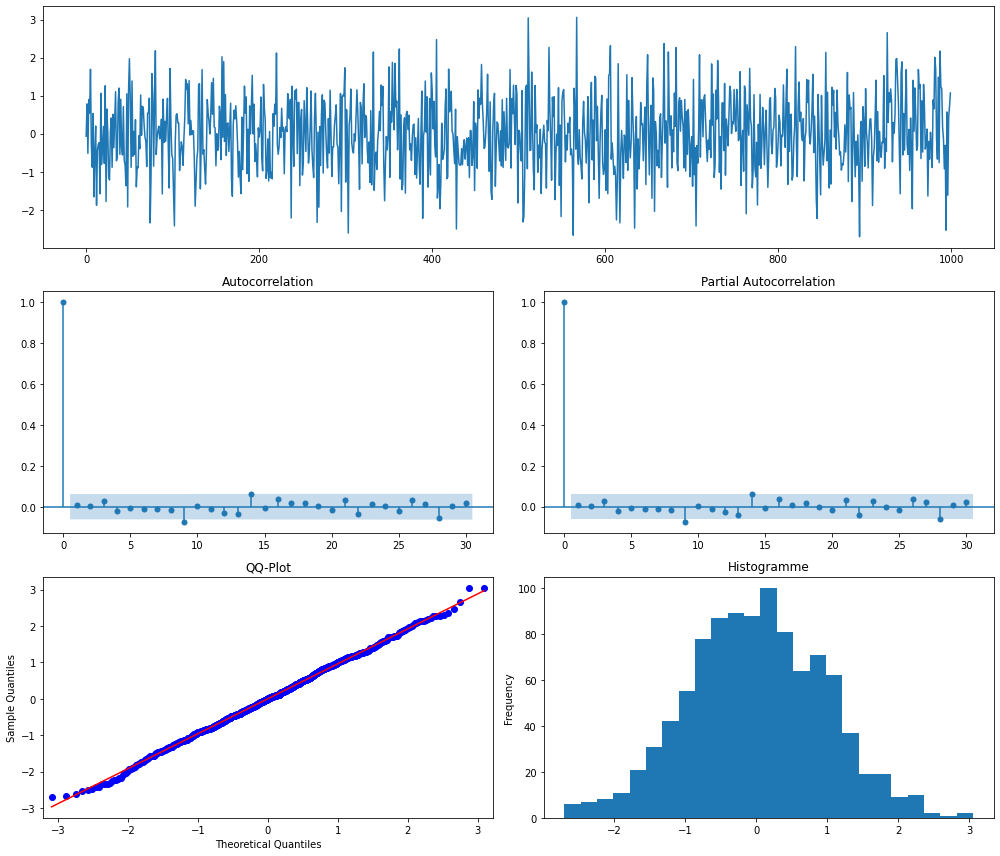

In [1]:
import numpy as np
e = np.random.normal(size=1000)

import fonctions as fct
fct.ts_plot(e)

**Interprétation :** les graphiques ci-dessus ressemblent à la structure souhaitée d'une série chronologique d'erreurs :
- pas de pics dans les graphes ACF et PACF 
- le QQ-plot et l'histogramme indiquent un comportement normal

### La marche aléatoire

Un processus de marche aléatoire $\{x_t\}_{t=1}^{T}$ est une série qui vérifie :  
$x_t = x_{t-1} + \epsilon_t$ avec $\epsilon_t$ un bruit blanc

Ci-dessous, on simule et visualise une marche aléatoire.

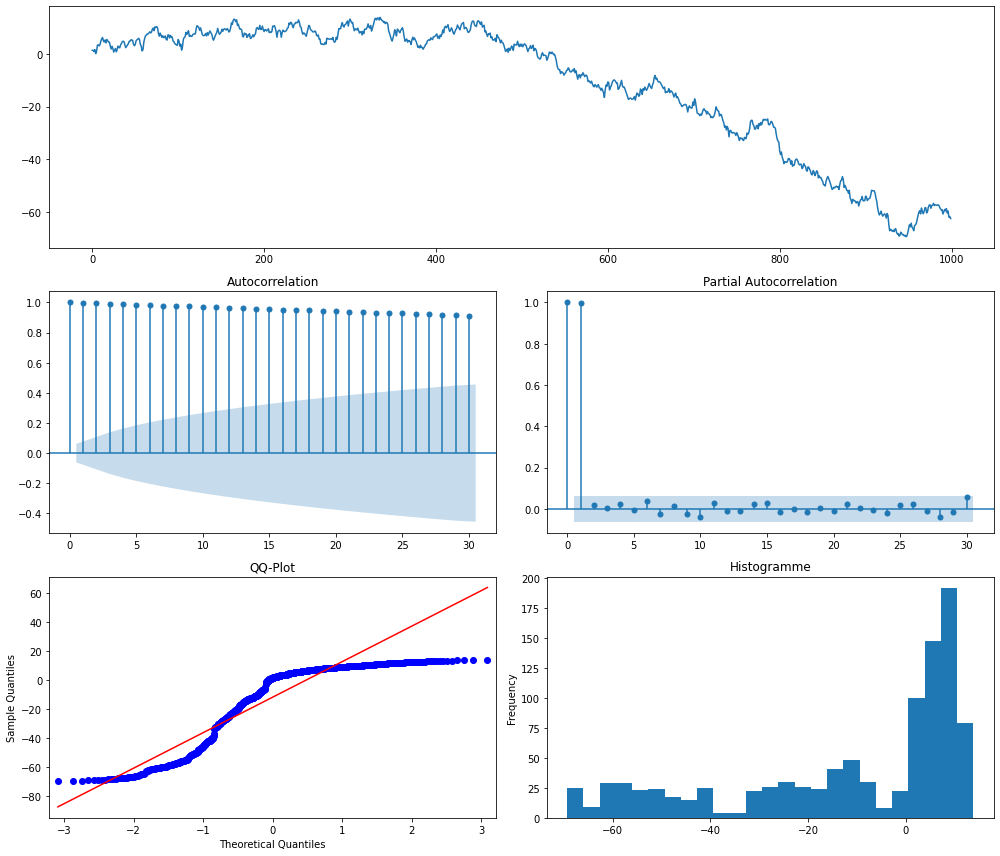

In [2]:
#paramètres
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
 
for t in range(T):
    x[t] = x[t-1] + e[t]

fct.ts_plot(x)

**Interprétation :** on voit la ressemblance entre ce processus de marche aléatoire et les cours d'actifs en bourse qui sont caractérisés par : 
- un ACF élevé pour toute longueur de décalage et un PACF élevé pour le premier décalage uniquement 
- un QQ-plot et un histogramme indiquant que la série n'est pas un bruit blanc

La marche aléatoire n'est clairement pas une série stationnaire. Par contre, la série différenciée $(x_t - x_{t-1})$ est stationnaire puisqu'elle vaut $(\epsilon_t)$ qui est un bruit blanc gaussien. 

### Modèle autorégressif

Une série temporelle $\{x_t\}_{t=1}^{T}$ qui suit un modèle autorégressif d'ordre $p$ (et noté $AR(p)$) est telle que :  
$x_t = \mu + \Sigma_{i=1}^{p}\phi_i x_{t-i} + \epsilon_t$ avec $\mu$ une constante et $\epsilon_t$ un bruit blanc

Concrètement, cela signifie que la valeur de la série au temps $t$ est une combinaison linéaire des $p$ valeurs précédentes (à un terme d'erreur $\epsilon_t$ près).

Un processus autorégressif d'ordre 1 est donc donné par :
$AR(1)$ : $x_t = \mu + \phi x_{t-1} + \epsilon_t$ 

On simule et visualise un processus $AR(1)$ ci-dessous.

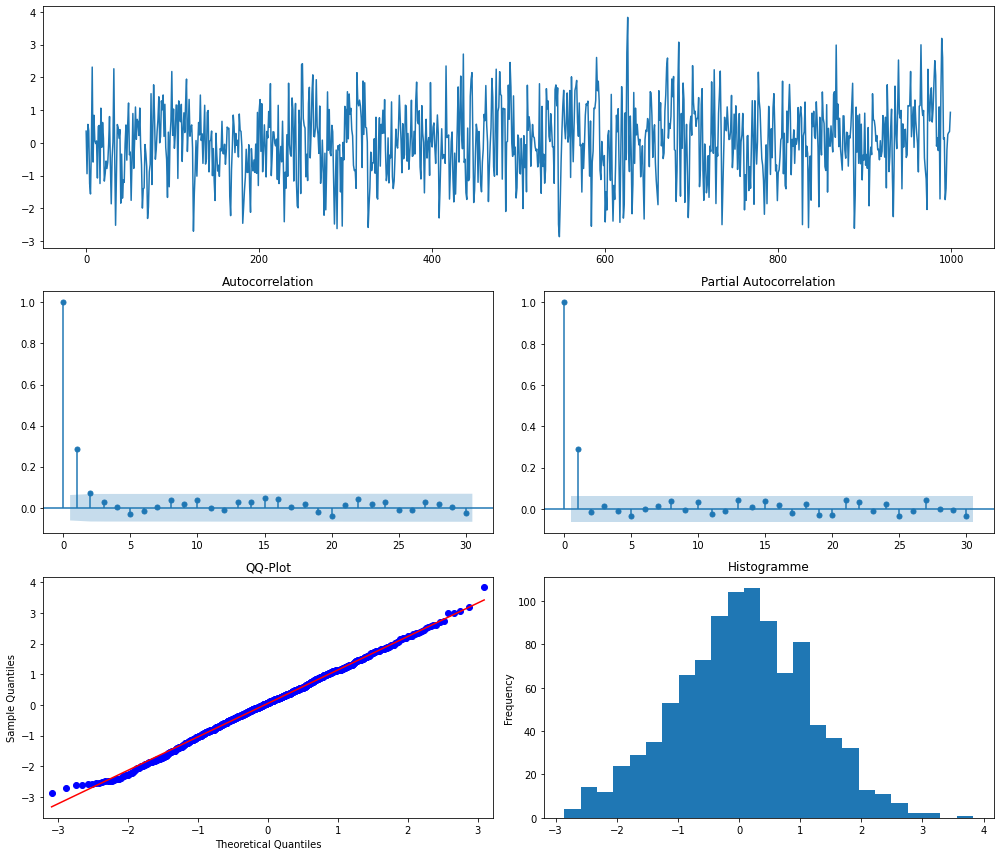

In [3]:
#paramètres
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
phi = 0.3
 
for t in range(T):
    x[t] = phi * x[t-1] + e[t]
    
fct.ts_plot(x)

**Interprétation :**
- pour un processus AR(1) avec $\phi=0.3$,on voit sur les graphiques ACF et PACF, un pic au premier décalage qui tend tout de suite vers 0.
- l'histogramme et le QQ-plot indiquent des résidus presque aléatoires.

*Remarque pas anodine* : la marche aléatoire introduite précédemment est un processus AR(1) avec $\phi=1$ et n'est pas stationnaire. Or ici, on peut voir qu'avec $\phi=0.3$, le processus AR(1) semble stationnaire. Bizarre...vous avez dit bizarre ? En fait, la stationnarité d'un processus $AR(1)$ dépend de si $|\phi|<1$. On peut généraliser cette propriété aux processus $AR(p)$.

### Modèle moyenne mobile

Le modèle de moyenne mobile d'ordre $q$ noté $MA(q)$ (pour *moving-average*) suppose que la série temporelle observée peut être représentée par une combinaison linéaire de termes d'erreur de bruit blanc. Cela s'écrit donc :  
$x_t = \epsilon_t + \Sigma_{i=1}^{q}\theta_i\epsilon_{t-i}$ avec $\epsilon_t$ un bruit blanc

Et c'est parti pour la simulation et la visualisation d'un processus $MA(2)$.

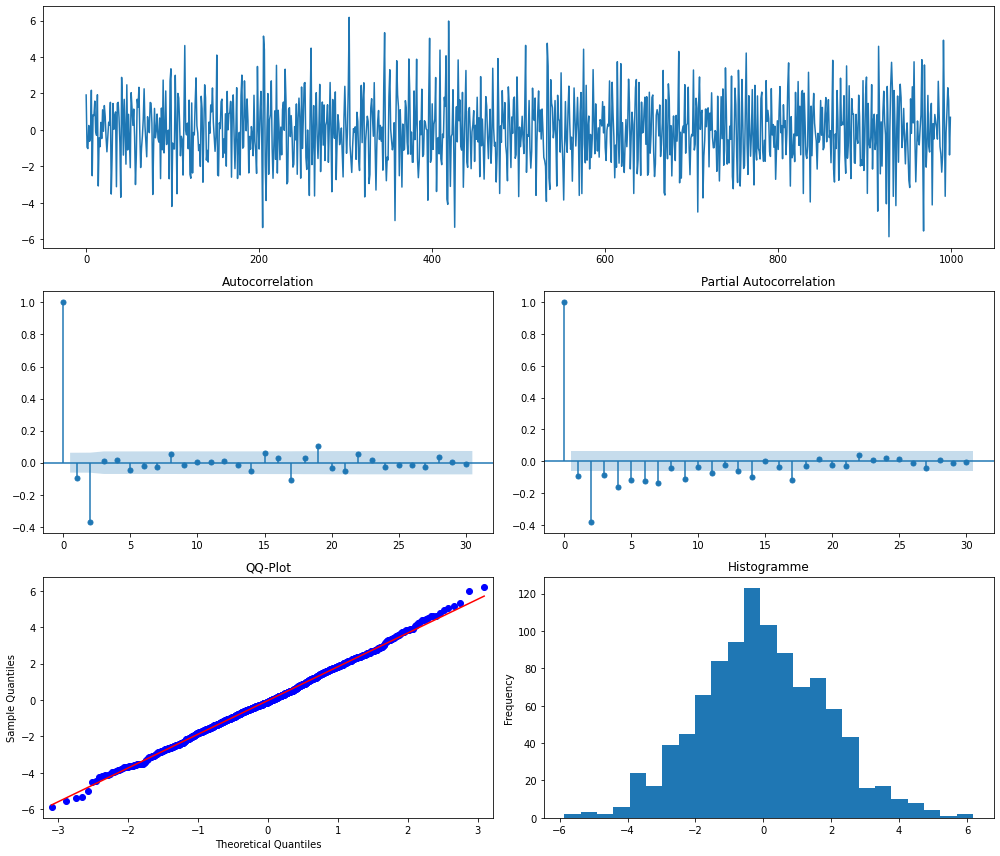

In [4]:
#paramètres
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
theta1 = 0.8
theta2 = -1.4
 
for t in range(T):
    x[t] = e[t] + theta1 * e[t-1] + theta2 * e[t-2]

fct.ts_plot(x)

**Interprétation :** pour le processus $MA(2)$ avec les paramètres choisis, on voit un pic plus important pour le deuxième décalage dans les tracés ACF et PACF. 
On peut observer également que le pic dans le graphique PACF ne décroît pas immédiatement mais prend quelques périodes pour se "désintégrer".

*Remarque toujours pas anodine* : en tant que combinaison linéaire de processus stationnaires, un processus $MA(q)$ est toujours stationnaire.

### Modèle autorégressif et moyenne mobile

Ça va commencer à se corser un peu avec le processus $ARMA(p,q)$ qui est une combinaison des deux modèles précédents et s'écrit donc :  
$x_t = \epsilon_t + \Sigma_{i=1}^{p}\phi_i x_{t-i} + \Sigma_{i=1}^{q}\theta_i\epsilon_{t-i}$ avec $\epsilon_t$ un bruit blanc

Regardons à quoi ressemble un $ARMA(2,3)$.

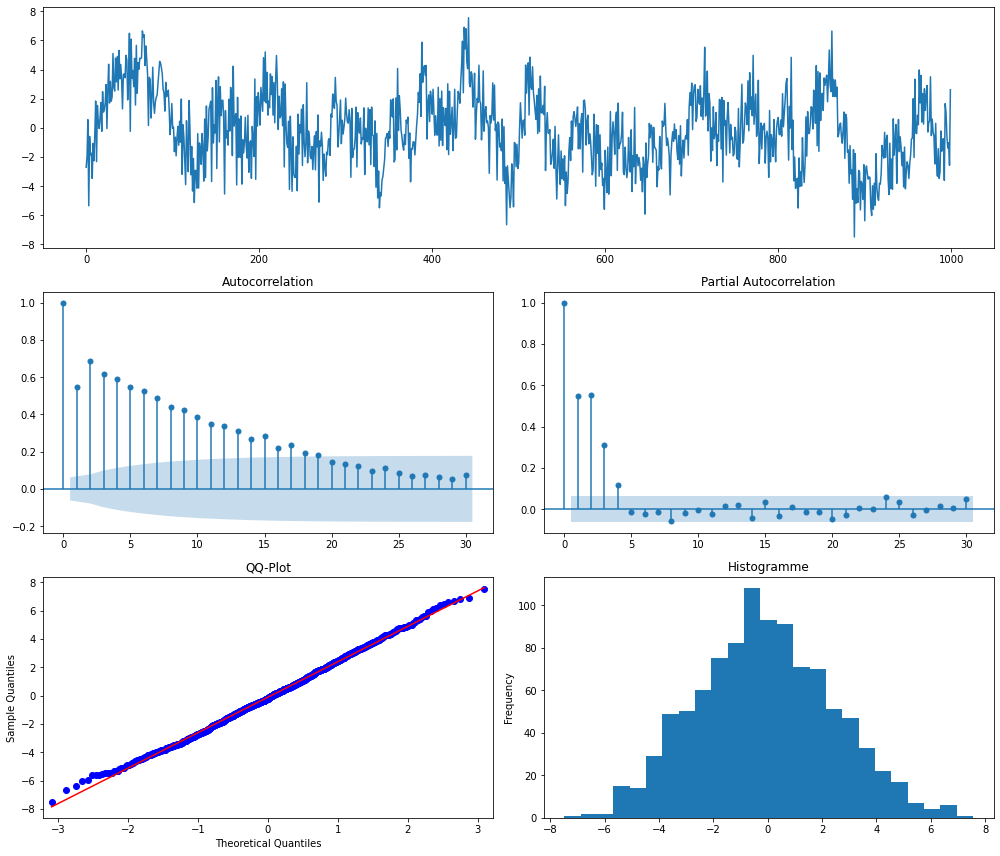

In [5]:
#paramètres
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
phi1 = 0.3
phi2 = 0.6
theta1 = 0.8
theta2 = -1.1
theta3 = 0.5

for t in range(T):
    x[t] = e[t] + phi1 * x[t-1] + phi2 * x[t-2] + theta1 * e[t-1] + theta2 * e[t-2] + theta3 * e[t-3]

fct.ts_plot(x)

**Interprétation :** on voit clairement que la série n'est pas stationnaire et que les résidus ne sont pas normaux mais on n'ira pas plus loin pour l'interprétation...

Maintenant qu'on a fait un bon petit tour d'horizon théoriques des propriétés des séries temporelles, allons en voir des vraies dans leur milieu naturel !

## Des exemples de séries temporelles

On va simplement regarder quelques séries temporelles et les commenter graphiquement.

La série "sunspot" ci-dessous recense le nombre annuel de [tâches solaires](https://fr.wikipedia.org/wiki/Tache_solaire) de 1790 à 1970.

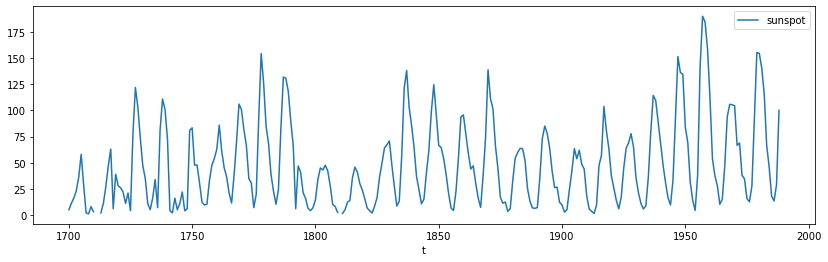

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

sunspot = pd.read_csv("data/sunspot.csv", index_col="t")
sunspot.plot(y="sunspot", figsize=(14,4));

Quelques remarques :
- cette série n'est clairement pas stationnaire
- il ne semble pas y avoir de saisonnalité
- par contre, elle semble présenter des cycles avec un pic plus ou moins tous les 10 ans dont l'amplitude semble légèrement augmenter au cours du temps
- cette série ne semble pas très bruitée (c'est-à-dire qu'il n'y a pas une forte variabilité d'un point à l'autre qui se traduirait par des pics très rapprochés comme pour les séries d'actifs financiers par exemple). Attention toutefois, avant de conclure là-dessus il faut s'assurer de la fréquence de la série (annuelle).

La série "uspop" ci-dessous recense la population des Etats-Unis, en millions, de 1790 à 1990 (avec une fréquence décennale).

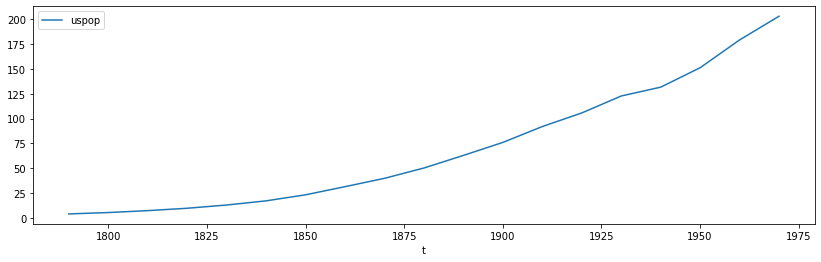

In [7]:
uspop = pd.read_csv("data/uspop.csv", index_col="t")
uspop.plot(y="uspop", figsize=(14,4));

Quelques remarques :
- cette série n'est pas stationnaire
- cette série est très lisse puisqu'elle ne présente ni saisonnalité, ni cycle, ni bruit
- on identifie donc uniquement une tendance

La série "beer" ci-dessous mesure la production mensuelle de bière en Australie, en mégalitres, de janvier 1956 à août 1995.

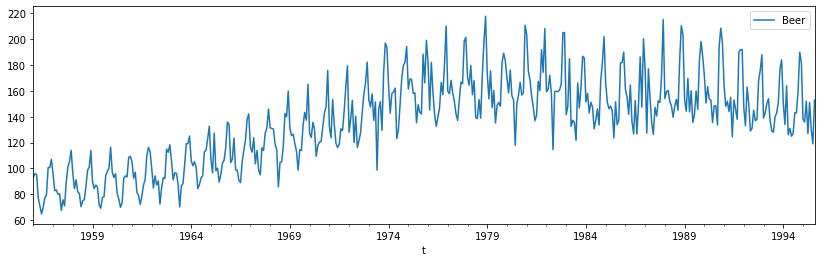

In [8]:
beer = pd.read_csv("data/beer.csv", header=None, names=["t", "Beer"], parse_dates=True, dayfirst=True, index_col="t")
beer.plot(y="Beer", figsize=(14,4));

Quelques remarques :
- cette série n'est pas stationnaire
- il y a une tendance à la hausse jusqu'à la fin des années 70 puis une légère baisse et une stabilisation
- il ne semble pas y avoir de cycles
- en revanche, il y a bien une saisonnalité avec un "motif" annuel qui se répète contenant un pic haut (parfois un 2ème identifiable) et un creux

Voilà quelques exemples d'analyse graphique, et rapide, de séries temporelles. Comme toujours, le code ayant généré ce notebook est disponible sur le [github de Statoscop](https://github.com/Statoscop/notebooks-blog). Maintenant, la question est de savoir comment on va pouvoir identifier les différents éléments composant une série avant de s'intéresser à leur modélisation et prédiction. Alors, impatients de savoir comment décomposer une série temporelle ? La suite dans le prochain post !